In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")


In [3]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
def data_clean(df):
    df.fillna(0,inplace=True)
    print(df.isnull().sum())

In [7]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
for i in ['adults', 'children', 'babies']:
    print('{} has unique value as {}'.format(i, df[i].unique()))


adults has unique value as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
children has unique value as [ 0.  1.  2. 10.  3.]
babies has unique value as [ 0  1  2 10  9]


In [10]:
filter=(df['children']==0)&(df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,09-07-2017


In [11]:
pd.set_option('display.max_columns',32)

In [12]:
filter=(df['children']==0)&(df['adults']==0)&(df['babies']==0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10-06-2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10-12-2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,01-04-2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,01-05-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,07-01-2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")


In [14]:
filter = df['is_canceled'] == 0  # This is the condition: booking not canceled


In [15]:
data = df[~filter]  # This excludes rows where 'is_canceled' == 0


In [16]:
data.head()  # This shows the first 5 rows of the filtered data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,05-06-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,4/22/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,6/23/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,05-11-2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,E,0,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,5/29/2015


In [17]:
country_wise_data = data['country'].value_counts().reset_index()
country_wise_data.columns = ['country', 'count']  # Renaming columns for better clarity


In [18]:
country_wise_data.columns=['country','No of guests']
country_wise_data


,country,No of guests
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
...,...,...
122,TMP,1
123,LIE,1
124,UMI,1
125,GNB,1


In [19]:
import folium
from folium.plugins import HeatMap

In [20]:
folium.Map()

In [21]:
import plotly.express as px

In [22]:
print(country_wise_data.columns)


Index(['country', 'No of guests'], dtype='object')


In [23]:
locations = country_wise_data['country']  # if the column is named 'Country'


In [24]:
map_guest = px.choropleth(
    country_wise_data,
    locations='country',  # Ensure this matches the actual column name
    color='No of guests',
    hover_name='country', 
    title='Home country of guests'
)


In [25]:
map_guest.show()

In [26]:
data2=data[data['is_canceled']==0]

In [27]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
print(data2.columns)
print(data2.head())


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repe

In [30]:
data2 = data2.dropna(subset=['reserved_room_type', 'adr', 'hotel'])


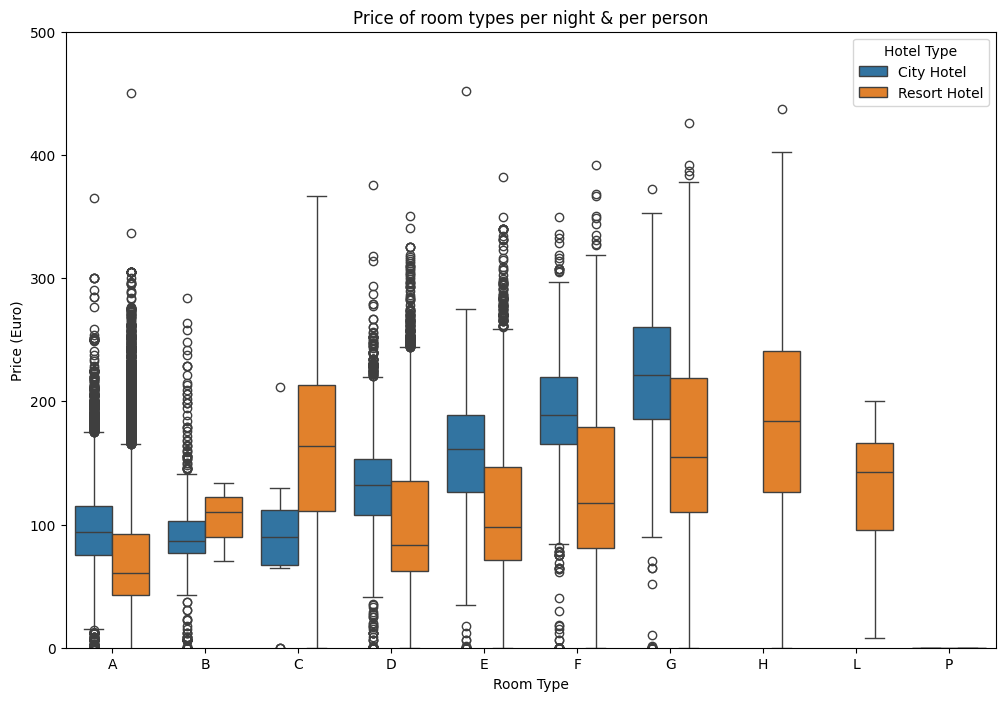

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")

# Select relevant columns
data2 = data[['hotel', 'reserved_room_type', 'adr']].dropna()

# Optional: Convert to category
data2['hotel'] = data2['hotel'].astype('category')
data2['reserved_room_type'] = data2['reserved_room_type'].astype('category')

# Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='reserved_room_type', y='adr', hue='hotel', data=data2)

plt.title('Price of room types per night & per person')
plt.xlabel('Room Type')
plt.ylabel('Price (Euro)')
plt.ylim(0, 500)  # ✅ Limit y-axis from 0 to 500
plt.legend(title='Hotel Type')
plt.show()


In [32]:
print(data.columns.tolist())



['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [33]:
data_resort = data[(data['hotel'] == 'Resort Hotel') & (data['is_canceled'] == 0)]
data_city = data[(data['hotel'] == 'City Hotel') & (data['is_canceled'] == 0)]


In [34]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [35]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [36]:
print(resort_hotel)


   arrival_date_month         adr
0               April   75.867816
1              August  181.205892
2            December   68.322236
3            February   54.147478
4             January   48.708919
5                July  150.122528
6                June  107.921869
7               March   57.012487
8                 May   76.657558
9            November   48.681640
10            October   61.727505
11          September   96.416860


In [37]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.856824
1,August,118.412083
2,December,87.856764
3,February,86.183025
4,January,82.160634
5,July,115.563810
6,June,117.702075
7,March,90.170722
8,May,120.445842
9,November,86.500456


In [38]:
final = resort_hotel.merge(city_hotel, on='arrival_date_month')
final.columns = ['month', 'price_for_resort', 'price_for_city_hotel']
final


,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634
5,July,150.122528,115.563810
6,June,107.921869,117.702075
7,March,57.012487,90.170722
8,May,76.657558,120.445842
9,November,48.681640,86.500456


In [39]:
import sort_dataframeby_monthorweek as sd

In [40]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)

In [41]:
final=sort_data(final,'month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.708919,82.160634
1,February,54.147478,86.183025
2,March,57.012487,90.170722
3,April,75.867816,111.856824
4,May,76.657558,120.445842
5,June,107.921869,117.702075
6,July,150.122528,115.563810
7,August,181.205892,118.412083
8,September,96.416860,112.598452
9,October,61.727505,101.745956


In [42]:
final.columns

Index(['month', 'price_for_resort', 'price_for_city_hotel'], dtype='object')

In [43]:
px.line(final, x='month', y=['price_for_city_hotel'], title='Room price per night over the months')


In [44]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [45]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [46]:
final_rush=rush_resort.merge(rush_city,on='month')

In [47]:
final_rush.columns = ['months', 'no of guests in resort', 'no of guests in city hotel']
final_rush


,months,no of guests in resort,no of guests in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


In [48]:
final_rush.columns

Index(['months', 'no of guests in resort', 'no of guests in city hotel'], dtype='object')

In [49]:
px.line(final_rush, x='months', y=['no of guests in resort', 'no of guests in city hotel'], title='Total guests over months')


In [50]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [51]:
data.select_dtypes(include='number').corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [52]:
co_relation=data.select_dtypes(include='number').corr()['is_canceled']
co_relation

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

In [53]:
co_relation.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [54]:
data.groupby('is_canceled')['reservation_status'].value_counts()

is_canceled  reservation_status
0            Check-Out             75166
1            Canceled              43017
             No-Show                1207
Name: count, dtype: int64

In [55]:
list_not=['days_in_waiting_list','arrival_date_year']

In [56]:
[col for col in data.columns if data[col].dtype!='0' and col not in list_not]

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [57]:
cols=[]
for col in data.columns:
    if data[col].dtype!='O' and col not in list_not:
        cols.append(col)
cols

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [58]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [59]:
cat_not=['arrival_date_year','assigned_room_type','booking_changes','reservation_status','country','days_in_waiting_list']
cat_not

['arrival_date_year',
 'assigned_room_type',
 'booking_changes',
 'reservation_status',
 'country',
 'days_in_waiting_list']

In [60]:
cat_features=[col for col in data.columns if data[col].dtype=='O'and col not in cat_not]

In [61]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

In [62]:
data_cat=data[cat_features]

In [63]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,07-01-2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,07-01-2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,07-02-2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,07-02-2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,07-03-2015


In [64]:
data_cat.dtypes

hotel                      object
arrival_date_month         object
meal                       object
market_segment             object
distribution_channel       object
reserved_room_type         object
deposit_type               object
customer_type              object
reservation_status_date    object
dtype: object

In [65]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [66]:
data_cat['reservation_status_date'] = pd.to_datetime(data_cat['reservation_status_date'], errors='coerce')


In [67]:
data_cat['year']=data_cat['reservation_status_date'].dt.year
data_cat['month']=data_cat['reservation_status_date'].dt.month
data_cat['day']=data_cat['reservation_status_date'].dt.day

In [68]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015.0,7.0,1.0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015.0,7.0,1.0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015.0,7.0,2.0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015.0,7.0,2.0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015.0,7.0,3.0


In [69]:
data_cat.drop('reservation_status_date', axis=1, inplace=True)


In [70]:
data_cat['cancelllation']=data['is_canceled']

In [71]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,cancelllation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015.0,7.0,1.0,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015.0,7.0,1.0,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015.0,7.0,2.0,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015.0,7.0,2.0,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015.0,7.0,3.0,0


In [72]:
import pandas as pd

# Load the CSV
data = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")

# Create a copy for categorical data (if needed)
data_cat = data.copy()

# Check unique values in 'market_segment'
print(data_cat['market_segment'].unique())


['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [73]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights'],
      dtype='object')

In [74]:
print(data_cat.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [75]:
for col in cols:
    print(data_cat.groupby(col)['is_canceled'].mean().to_dict())
    print('\n')

{'City Hotel': 0.41726963317786464, 'Resort Hotel': 0.27763354967548676}


{0: 0.0, 1: 1.0}


{0: 0.0677698975571316, 1: 0.09277456647398843, 2: 0.10294828419526342, 3: 0.10022026431718062, 4: 0.10262390670553936, 5: 0.131629392971246, 6: 0.1397923875432526, 7: 0.12922614575507138, 8: 0.19595782073813708, 9: 0.22076612903225806, 10: 0.22745901639344263, 11: 0.209478672985782, 12: 0.25764596848934196, 13: 0.2046285018270402, 14: 0.22279792746113988, 15: 0.300357568533969, 16: 0.2484076433121019, 17: 0.2656072644721907, 18: 0.3159806295399516, 19: 0.3110846245530393, 20: 0.2906666666666667, 21: 0.28171091445427726, 22: 0.3041018387553041, 23: 0.3297045101088647, 24: 0.26766917293233083, 25: 0.32006125574272587, 26: 0.3502235469448584, 27: 0.37750385208012327, 28: 0.41341463414634144, 29: 0.2949438202247191, 30: 0.36874051593323215, 31: 0.2759124087591241, 32: 0.33043478260869563, 33: 0.36391912908242613, 34: 0.39855072463768115, 35: 0.3236641221374046, 36: 0.2971342383107089, 37: 0.47399

In [76]:
for col in cols:
    col_avg_dict = data_cat.groupby(col)['is_canceled'].mean().to_dict()
    print(col_avg_dict)
    data_cat[col] = data_cat[col].map(col_avg_dict)


{'City Hotel': 0.41726963317786464, 'Resort Hotel': 0.27763354967548676}
{0: 0.0, 1: 1.0}
{0: 0.0677698975571316, 1: 0.09277456647398843, 2: 0.10294828419526342, 3: 0.10022026431718062, 4: 0.10262390670553936, 5: 0.131629392971246, 6: 0.1397923875432526, 7: 0.12922614575507138, 8: 0.19595782073813708, 9: 0.22076612903225806, 10: 0.22745901639344263, 11: 0.209478672985782, 12: 0.25764596848934196, 13: 0.2046285018270402, 14: 0.22279792746113988, 15: 0.300357568533969, 16: 0.2484076433121019, 17: 0.2656072644721907, 18: 0.3159806295399516, 19: 0.3110846245530393, 20: 0.2906666666666667, 21: 0.28171091445427726, 22: 0.3041018387553041, 23: 0.3297045101088647, 24: 0.26766917293233083, 25: 0.32006125574272587, 26: 0.3502235469448584, 27: 0.37750385208012327, 28: 0.41341463414634144, 29: 0.2949438202247191, 30: 0.36874051593323215, 31: 0.2759124087591241, 32: 0.33043478260869563, 33: 0.36391912908242613, 34: 0.39855072463768115, 35: 0.3236641221374046, 36: 0.2971342383107089, 37: 0.473997028

In [77]:
data_cat.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0.277634,0.0,0.717241,0.370158,0.374536,0.369745,0.398235,0.375034,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,0.277634,0.0,0.000000,0.370158,0.374536,0.369745,0.398235,0.375034,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,0.277634,0.0,0.129226,0.370158,0.374536,0.369745,0.398235,0.375034,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,0.277634,0.0,0.204629,0.370158,0.374536,0.369745,0.398235,0.375034,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,0.277634,0.0,0.222798,0.370158,0.374536,0.369745,0.398235,0.375034,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [78]:
num_features = ['lead_time', 'adr', 'stays_in_weekend_nights']  # replace with actual numerical columns


In [79]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [80]:
dataframe = pd.concat([data_cat, data[num_features]], axis=1)


In [81]:
dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0.277634,0.0,0.717241,0.370158,0.374536,0.369745,0.398235,0.375034,0,2,0.0,0,BB,PRT,Direct,Direct,...,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0.277634,0.0,0.000000,0.370158,0.374536,0.369745,0.398235,0.375034,0,2,0.0,0,BB,PRT,Direct,Direct,...,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0.277634,0.0,0.129226,0.370158,0.374536,0.369745,0.398235,0.375034,1,1,0.0,0,BB,GBR,Direct,Direct,...,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0.277634,0.0,0.204629,0.370158,0.374536,0.369745,0.398235,0.375034,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0.277634,0.0,0.222798,0.370158,0.374536,0.369745,0.398235,0.375034,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


In [82]:
dataframe.drop('is_canceled',axis=1,inplace=True)

In [83]:
dataframe.shape

(119390, 50)

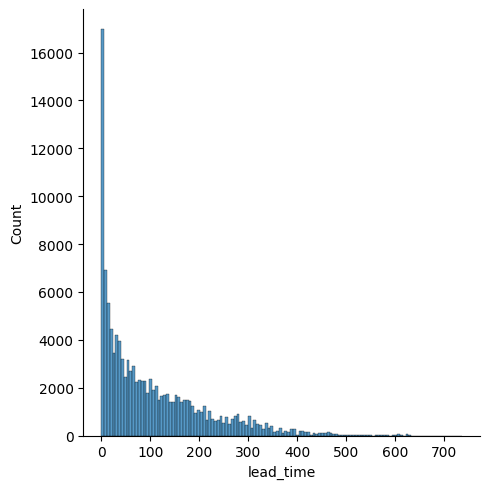

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
dataframe = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")

# Plot the distribution of lead_time
sns.displot(dataframe['lead_time'])
plt.show()


In [85]:
import numpy as np
def handle_error(col):
    dataframe[col]=np.logip(dataframe[col])

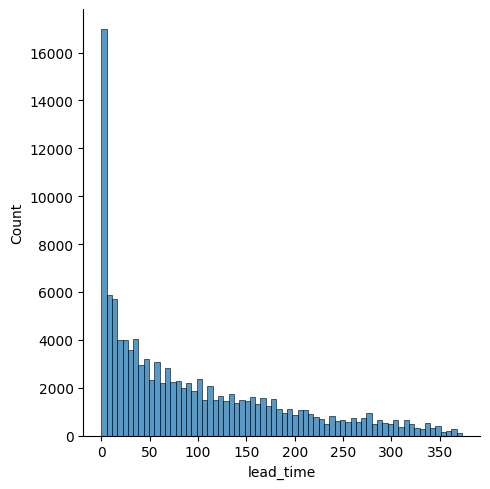

In [86]:
def handle_outlier(column):
    # Calculate Q1 and Q3
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Use the function
dataframe_no_outliers = handle_outlier('lead_time')

# Plot again to confirm
sns.displot(dataframe_no_outliers['lead_time'])
plt.show()


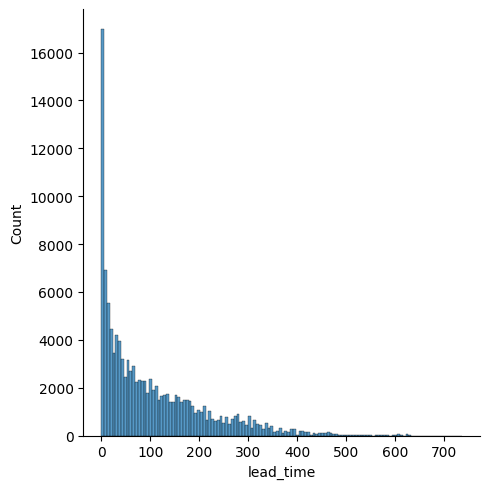

In [87]:
sns.displot(dataframe['lead_time'])

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [89]:
dataframe = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")


In [90]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])  # log1p(x) = log(1 + x)


In [91]:
handle_outlier('lead_time')


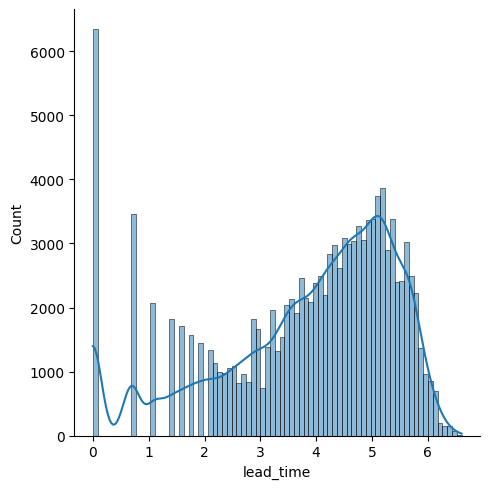

In [92]:
sns.displot(dataframe['lead_time'], kde=True)
plt.show()


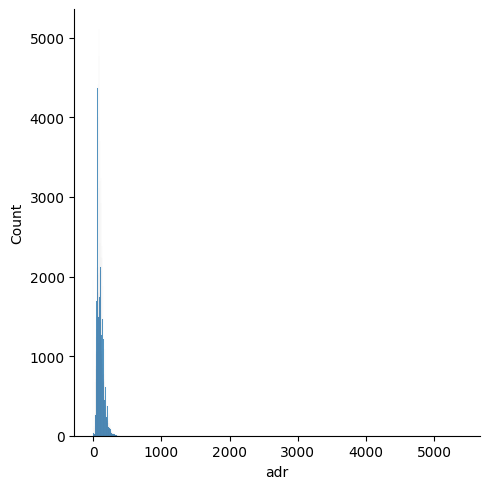

In [93]:
sns.displot(dataframe['adr'])

In [94]:
handle_outlier('adr')

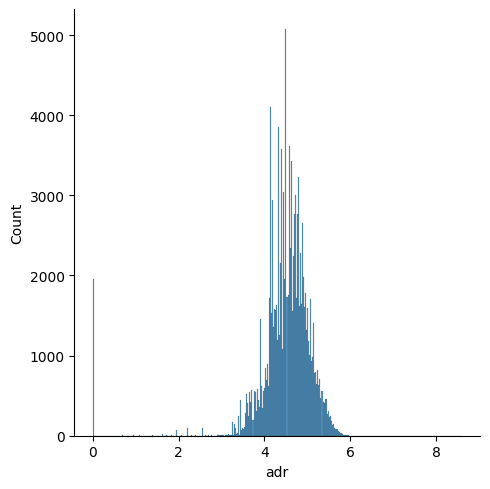

In [95]:
sns.displot(dataframe['adr'].dropna())

In [96]:
dataframe.dropna(inplace=True)

In [97]:
y=dataframe['is_canceled']
x=dataframe.drop('is_canceled',axis=1)

In [98]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [100]:

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [101]:
# Convert categorical columns to numeric
x_encoded = pd.get_dummies(x, drop_first=True)

# Now fit the model
feature_sel_model.fit(x_encoded, y)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [102]:
feature_sel_model.get_support()

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [103]:
cols=x.columns

In [104]:
# Check the shape of cols and the boolean array
print("Shape of cols:", len(cols))
print("Shape of feature_sel_model.get_support():", len(feature_sel_model.get_support()))

# If the boolean mask is larger than cols, make sure to use the correct feature set
if len(feature_sel_model.get_support()) == len(cols):
    selected_feat = cols[feature_sel_model.get_support()]
else:
    print("Mismatch in number of features between cols and the selected feature model. Check your inputs.")


Shape of cols: 31
Shape of feature_sel_model.get_support(): 153
Mismatch in number of features between cols and the selected feature model. Check your inputs.


In [105]:
import pandas as pd

# Load the CSV file
x = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")  # Use raw string (r'')

# Example: Let's say you selected some features
select = ['lead_time', 'adr', 'total_of_special_requests']  # Just an example list

# Now print the details
print('total_features {}'.format(x.shape[1]))
print('selected_features {}'.format(len(select)))


total_features 32
selected_features 3


In [106]:
select

['lead_time', 'adr', 'total_of_special_requests']

In [107]:
x=x[select]

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
x = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")

# Let's say you want to predict the "is_canceled" column
y = x['is_canceled']        # Target
x = x.drop('is_canceled', axis=1)  # Drop target from features

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


In [110]:
from sklearn.linear_model import LogisticRegression


In [111]:
logreg=LogisticRegression()

In [112]:
#print(X_train.isnull().sum())  # For a DataFrame


In [113]:
print(X_train.shape)
print(y_train.shape)


(89542, 31)
(89542,)


In [114]:
import numpy as np
print(X_train.isnull().sum())


hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             375
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12341
company                           84414
days_in_waiting_list                  0


In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")

# Target and features
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=["number"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Impute numeric columns with mean
num_imputer = SimpleImputer(strategy="mean")
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = num_imputer.transform(X_test[numeric_cols])

# Impute categorical columns with most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])

# Encode categorical columns using OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[categorical_cols] = encoder.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = encoder.transform(X_test[categorical_cols])

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[14876    31]
 [  333  8638]]
Accuracy Score: 0.984755842197839


In [116]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [117]:
y_pred=logreg.predict(X_test)

In [118]:
y_pred

array([0, 1, 0, ..., 0, 0, 1], shape=(23878,))

In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
confusion_matrix(y_test, y_pred)


array([[13285,  1622],
       [ 2941,  6030]])

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y_test,y_pred)

0.8089035932657677

In [123]:
from sklearn.model_selection import cross_val_score

### import pandas as pd

# Load your dataset (replace the path with the actual location of your file)
data = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")

# Check the first few rows of the dataset
print(data.head())

# Identify columns with non-numeric values (string columns)
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the encoded data
print(data_encoded.head())

# Check for null values in the dataset
print(data_encoded.isnull().sum())

# Fill or drop missing values (if necessary)
# Here, filling with mean for numeric columns and mode for categorical columns
data_encoded.fillna(data_encoded.mean(), inplace=True)
data_encoded.fillna(data_encoded.mode().iloc[0], inplace=True)

# Separate features (X) and target variable (y)
# Assuming your target column is 'is_canceled' or you can replace it with the correct column
X = data_encoded.drop('is_canceled', axis=1)  # Replace 'is_canceled' with your actual target column name
y = data_encoded['is_canceled']  # Replace with the actual target column name

# Now, X and y are ready for model training



In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r"C:\Users\ameya\OneDrive\Desktop\HotelBooking\hotel_bookings.csv")


# Handle categorical variables with one-hot encoding
categorical_columns = data.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Separate features and target
X = data_encoded.drop('is_canceled', axis=1)
y = data_encoded['is_canceled']

# Handle missing values using median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)  # returns a NumPy array

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878

Accuracy Score: 1.0


In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [126]:


# Initialize an empty list for the models
models = []

# Append different models
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))


In [127]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)

    predictions=model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions,y_test))
    print('\n')

    print(accuracy_score(predictions,y_test))
    print('\n')

Logistic Regression
[[14887   102]
 [   20  8869]]


0.994890694363012


Naive Bayes
[[14907     0]
 [    0  8971]]


1.0


Random Forest
[[14907     0]
 [    0  8971]]


1.0


Decision Tree
[[14907     0]
 [    0  8971]]


1.0


KNN
[[13034  2893]
 [ 1873  6078]]


0.8004020437222548


